In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import joblib

In [4]:
df=pd.read_csv('/content/UCI_Credit_Card[1].csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.drop('ID', inplace=True , axis=1)

## Dropping the ID column is important as it doesn't add any value and will disturb our model.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [7]:
df.rename(columns={'default.payment.next.month': 'default_payment_next_month'}, inplace=True)

In [8]:
df['SEX']=df['SEX'].astype('object')
df['EDUCATION']=df['EDUCATION'].astype('object')
df['MARRIAGE']=df['MARRIAGE'].astype('object')

In [9]:
df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [9]:
df.duplicated().sum()

np.int64(35)

In [10]:
df.drop_duplicates(inplace= True)

In [12]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# Univariate analysis

### **LIMIT_BAL : Amount of given credit**

/tmp/ipython-input-1953226793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'])


<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

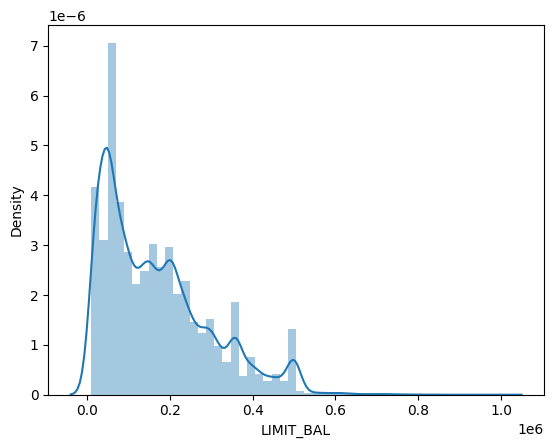

In [13]:
sns.distplot(df['LIMIT_BAL'])

<Axes: xlabel='LIMIT_BAL'>

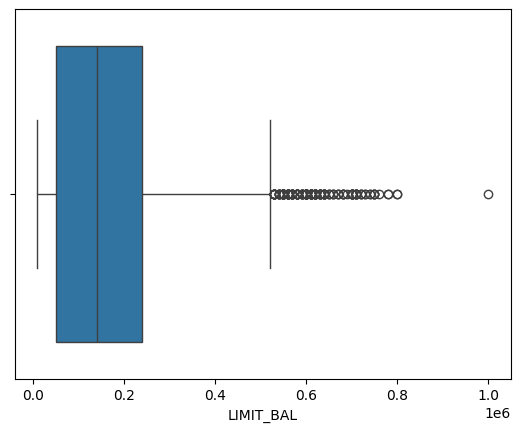

In [14]:
sns.boxplot(x='LIMIT_BAL', data=df)

<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

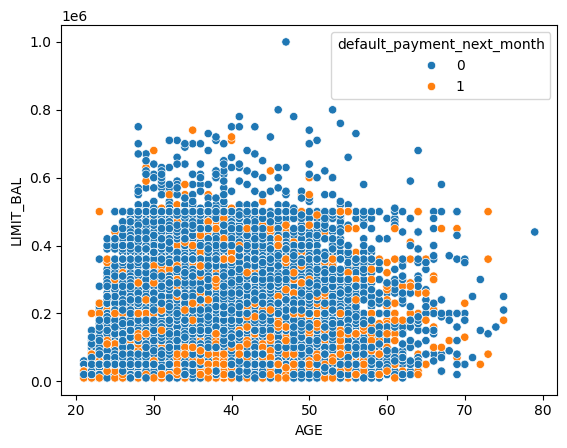

In [15]:
sns.scatterplot(x='AGE' , y='LIMIT_BAL',data=df,hue='default_payment_next_month')

## **SEX feature**

<Axes: xlabel='SEX', ylabel='count'>

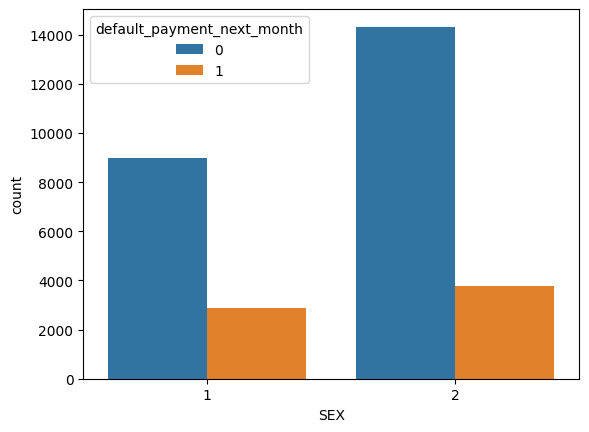

In [16]:
sns.countplot(x='SEX' , data=df , hue = 'default_payment_next_month')

## 1 : male , 2 : female

## Number of females is bigger than number of males .

## The number of females and males who won't pay is approximately equal .

## **EDUCATION feature**

## 1 :gaduate school , 2 : university , 3 : high school, 4 : others, 5 : unknown, 6: unknown

In [17]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14019
1,10563
3,4915
5,280
4,123
6,51
0,14


In [18]:
df['EDUCATION']=df['EDUCATION'].map({1:1,2:2,3:3,4:4 , 5:4 ,6:4,0:4 })

In [19]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

<Axes: xlabel='EDUCATION', ylabel='count'>

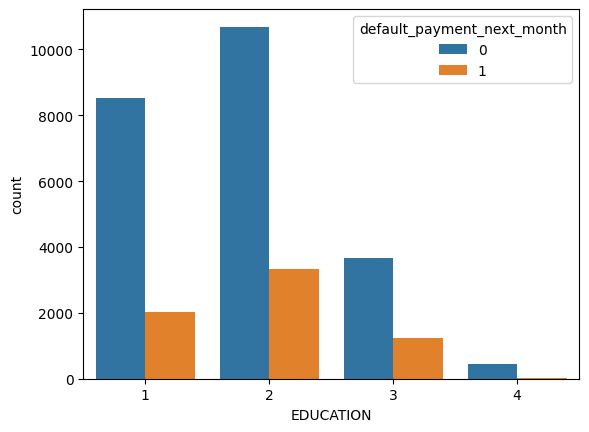

In [20]:
sns.countplot(x='EDUCATION', data=df , hue='default_payment_next_month')

### The highest number of users is University.

### It seems like the number of users who won't pay is approx. identical in all the education categories .

## **MARRIAGE feature**

In [21]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15945
1,13643
3,323
0,54


## 1 : married, 2 : single, 3 : others

In [22]:
df['MARRIAGE']=df['MARRIAGE'].map({1: 1, 2:2 ,3:3,0:3 })

<Axes: xlabel='MARRIAGE', ylabel='count'>

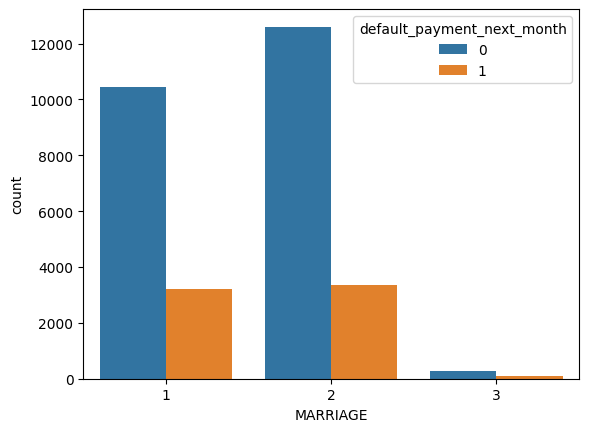

In [23]:
sns.countplot(x='MARRIAGE', data=df , hue='default_payment_next_month')

### The highest number of users is the single ones.
### Comparing the number of single and married users , the number of users who won't pay is larger in the marries status( Because of their responsibilities ).


## **AGE feature**

/tmp/ipython-input-430489512.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'])


<Axes: xlabel='AGE', ylabel='Density'>

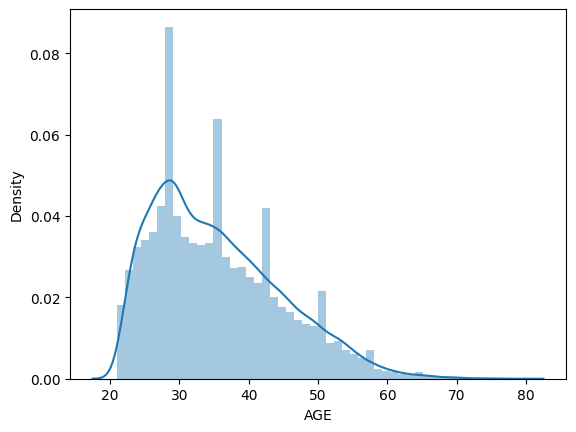

In [24]:
sns.distplot(df['AGE'])

<Axes: xlabel='AGE'>

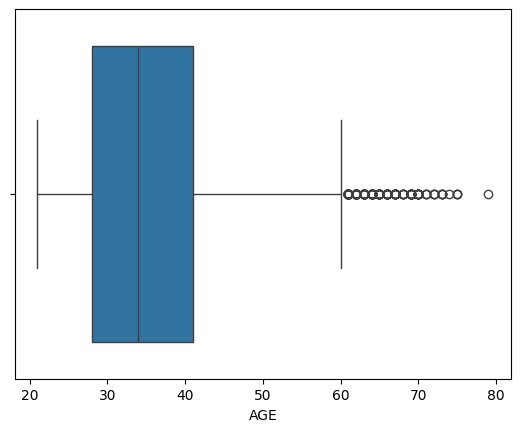

In [25]:
sns.boxplot(x='AGE', data=df)

<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

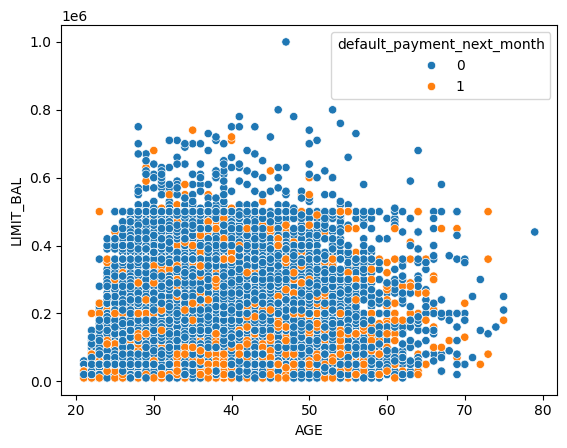

In [26]:
sns.scatterplot(x='AGE' , y='LIMIT_BAL',data=df,hue='default_payment_next_month')

### **PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)**


## For features **PAY_1 to PAY_6** :
### These features represent ordinal categories, not true numerical values.

### Their integer codes already reflect the correct order (e.g., -1 < 0 < 1 < 2 …).

### Therefore, no one-hot encoding is needed.



In [27]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

In [28]:
pay_cols = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for col in pay_cols:
    df[col] = df[col].astype('category')

/tmp/ipython-input-3534697560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PAY_1'])


<Axes: xlabel='PAY_1', ylabel='Density'>

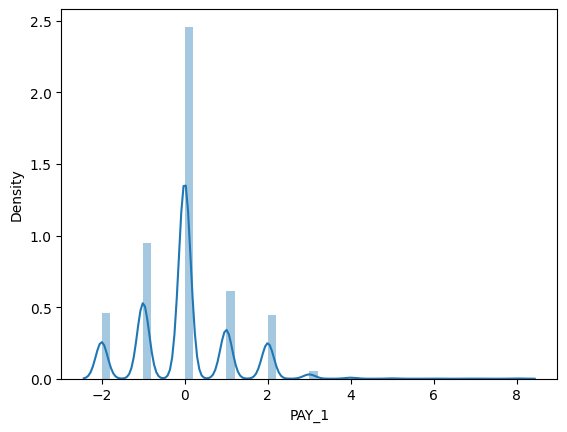

In [29]:
sns.distplot(df['PAY_1'])

In [30]:
df['PAY_1'].unique()

[2, -1, 0, -2, 1, ..., 4, 8, 7, 5, 6]
Length: 11
Categories (11, int64): [-2, -1, 0, 1, ..., 5, 6, 7, 8]

<Axes: xlabel='PAY_1', ylabel='count'>

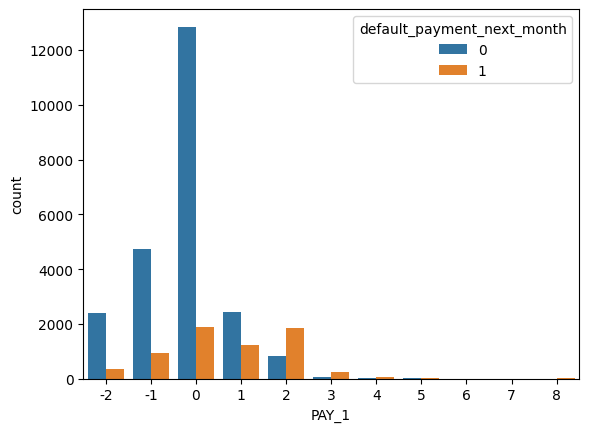

In [31]:
sns.countplot(x='PAY_1', data=df , hue = 'default_payment_next_month')

## **PAY_2: Repayment status in August, 2005**

<Axes: xlabel='PAY_2', ylabel='count'>

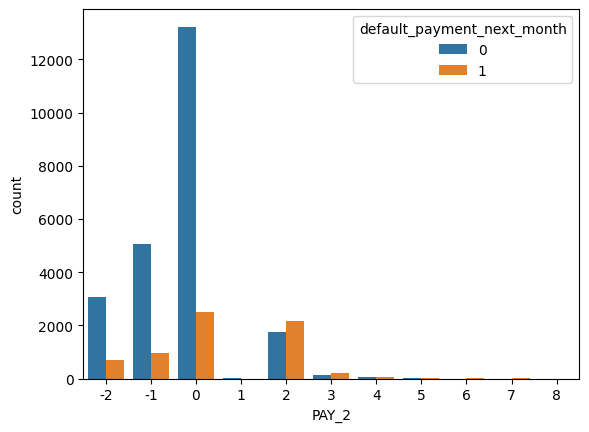

In [32]:
sns.countplot(x='PAY_2', data=df , hue = 'default_payment_next_month')

## **PAY_3: Repayment status in July, 2005**

<Axes: xlabel='PAY_3', ylabel='count'>

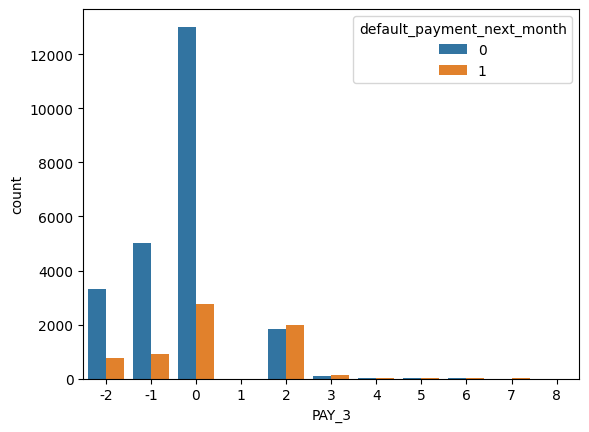

In [33]:
sns.countplot(x='PAY_3', data=df , hue = 'default_payment_next_month')

## **PAY_4: Repayment status in June, 2005**

<Axes: xlabel='PAY_4', ylabel='count'>

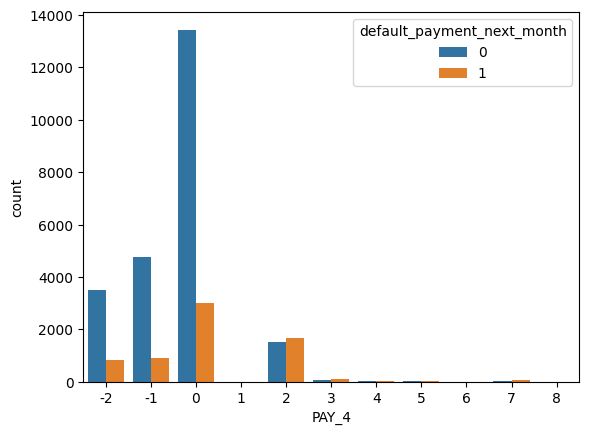

In [34]:
sns.countplot(x='PAY_4', data=df , hue = 'default_payment_next_month')

## **PAY_5: Repayment status in May, 2005**

<Axes: xlabel='PAY_5', ylabel='count'>

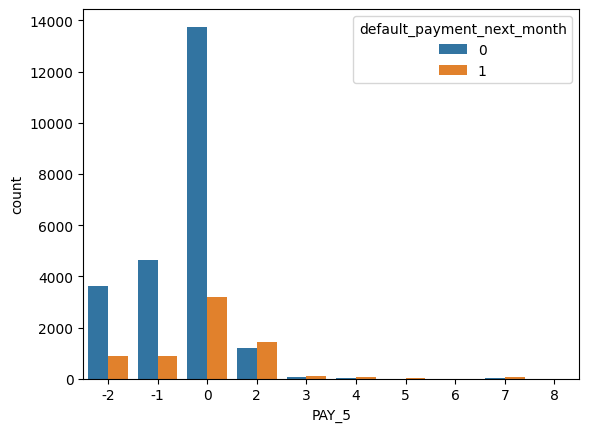

In [35]:
sns.countplot(x='PAY_5', data=df , hue = 'default_payment_next_month')

## **PAY_6: Repayment status in April, 2005**

<Axes: xlabel='PAY_6', ylabel='count'>

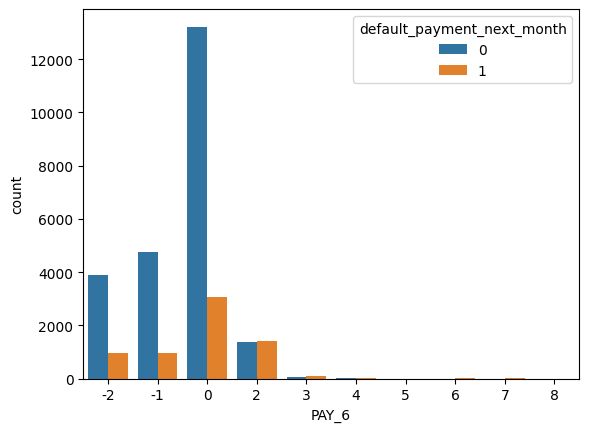

In [36]:
sns.countplot(x='PAY_6', data=df , hue = 'default_payment_next_month')

### The PAY_1 to PAY_6 variables represent repayment status codes rather than actual numeric values. These features are therefore treated as ordinal categorical variables. Encoding is applied using Label Encoding (or Target Encoding) to preserve the natural ordering of the delay categories. One-hot encoding is avoided because it ignores ordinal relationships and unnecessarily increases dimensionality.

## **BILL_AMT1: Amount of bill statement in September, 2005**

/tmp/ipython-input-1235016653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BILL_AMT1'])


<Axes: xlabel='BILL_AMT1', ylabel='Density'>

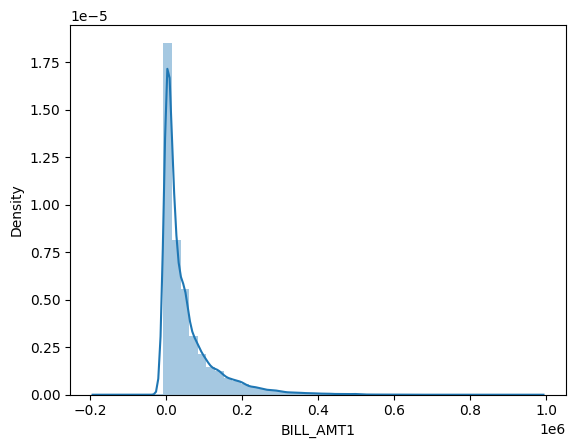

In [37]:
sns.distplot(df['BILL_AMT1'])

<Axes: xlabel='BILL_AMT1'>

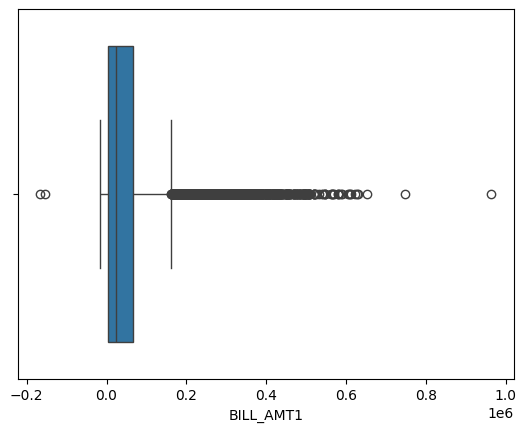

In [38]:
sns.boxplot(x='BILL_AMT1', data=df)

<Axes: xlabel='BILL_AMT1', ylabel='LIMIT_BAL'>

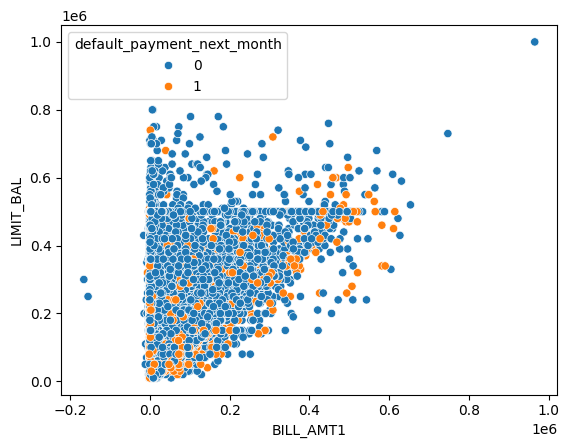

In [39]:
sns.scatterplot(x='BILL_AMT1', y='LIMIT_BAL',data=df , hue = 'default_payment_next_month')

## **BILL_AMT2: Amount of bill statement in August, 2005**

/tmp/ipython-input-218447913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BILL_AMT2'])


<Axes: xlabel='BILL_AMT2', ylabel='Density'>

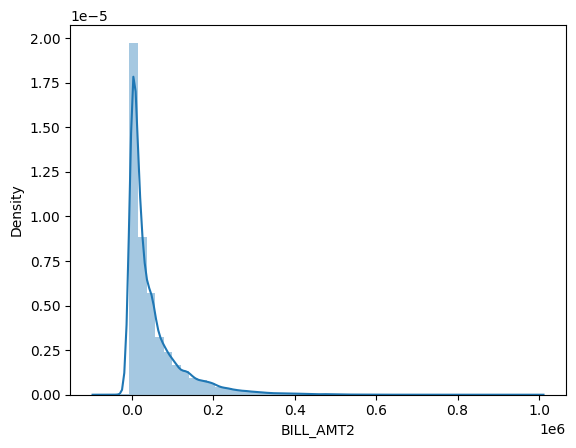

In [40]:
sns.distplot(df['BILL_AMT2'])

<Axes: xlabel='BILL_AMT2'>

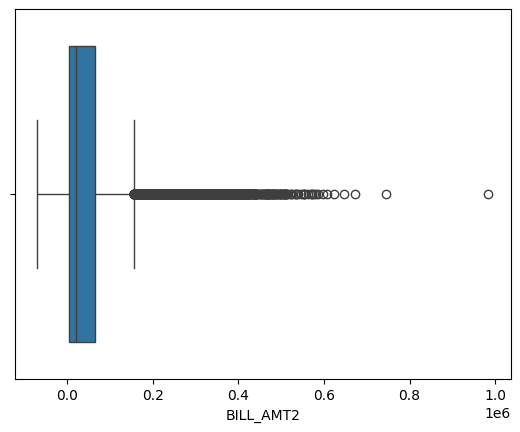

In [41]:
sns.boxplot(x='BILL_AMT2', data=df)

<Axes: xlabel='BILL_AMT2', ylabel='LIMIT_BAL'>

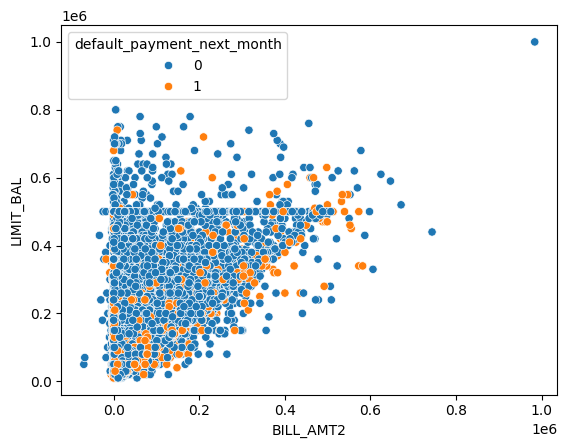

In [42]:
sns.scatterplot(x='BILL_AMT2', y='LIMIT_BAL',data=df , hue = 'default_payment_next_month')

## **BILL_AMT3: Amount of bill statement in July, 2005**

/tmp/ipython-input-3934441896.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BILL_AMT3'])


<Axes: xlabel='BILL_AMT3', ylabel='Density'>

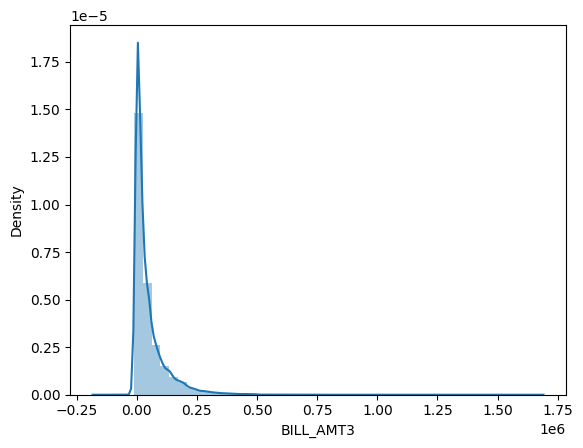

In [43]:
sns.distplot(df['BILL_AMT3'])

<Axes: xlabel='BILL_AMT3'>

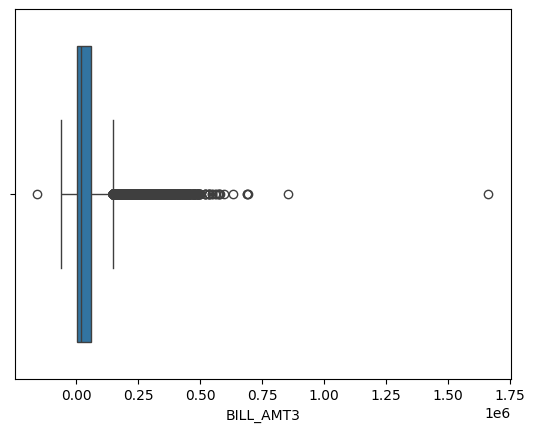

In [44]:
sns.boxplot(x='BILL_AMT3', data=df)

<Axes: xlabel='BILL_AMT3', ylabel='LIMIT_BAL'>

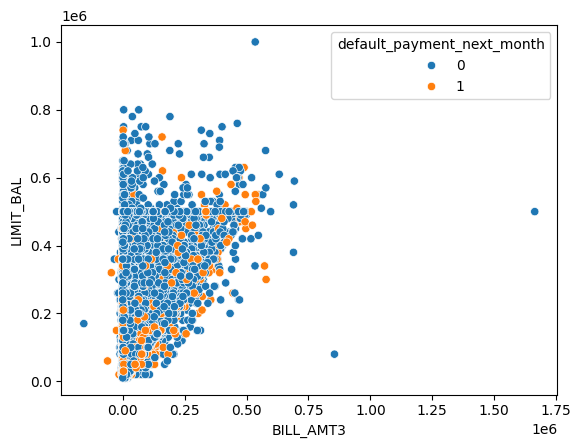

In [45]:
sns.scatterplot(x='BILL_AMT3', y='LIMIT_BAL',data=df , hue = 'default_payment_next_month')

## **BILL_AMT4: Amount of bill statement in June, 2005**

/tmp/ipython-input-4039210768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BILL_AMT4'])


<Axes: xlabel='BILL_AMT4', ylabel='Density'>

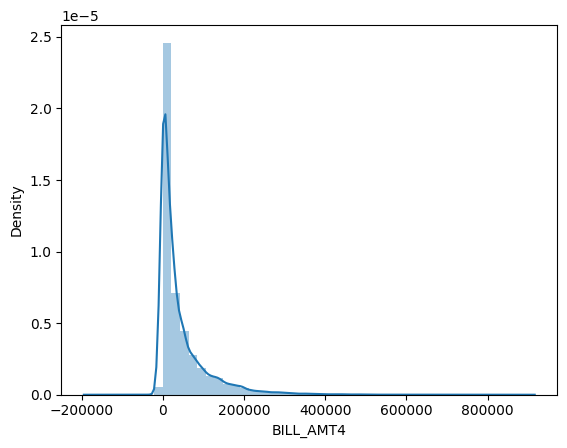

In [46]:
sns.distplot(df['BILL_AMT4'])

<Axes: xlabel='BILL_AMT4'>

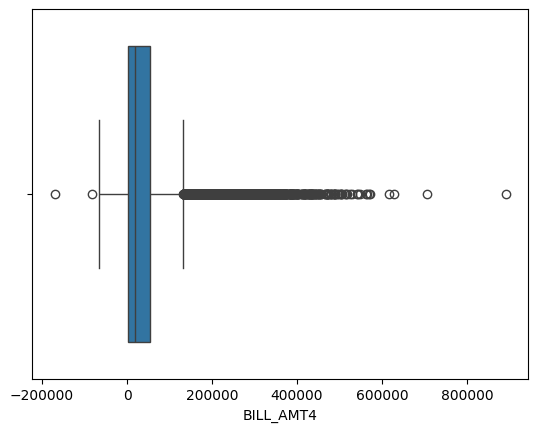

In [47]:
sns.boxplot(x='BILL_AMT4', data=df)

<Axes: xlabel='BILL_AMT4', ylabel='LIMIT_BAL'>

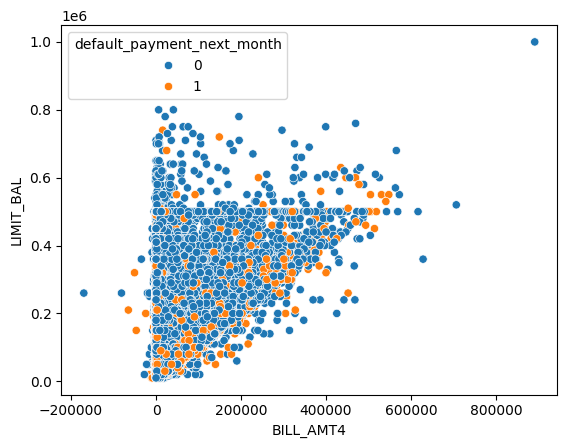

In [48]:
sns.scatterplot(x='BILL_AMT4', y='LIMIT_BAL',data=df , hue = 'default_payment_next_month')

## **BILL_AMT5: Amount of bill statement in May, 2005**

/tmp/ipython-input-1241259338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BILL_AMT5'])


<Axes: xlabel='BILL_AMT5', ylabel='Density'>

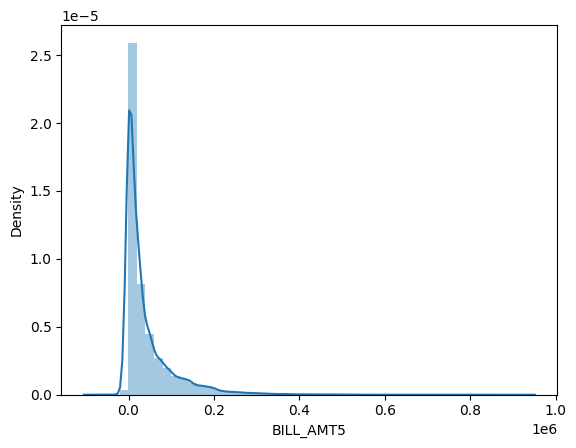

In [49]:
sns.distplot(df['BILL_AMT5'])

<Axes: xlabel='BILL_AMT5'>

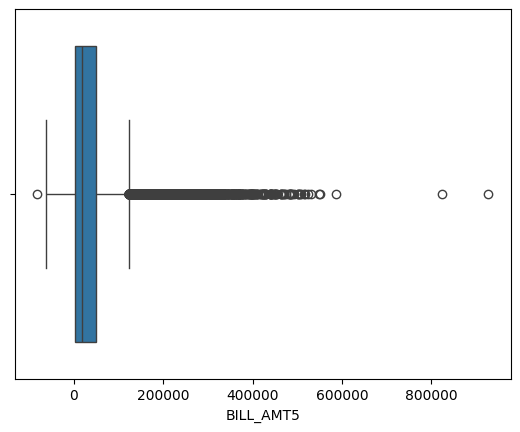

In [50]:
sns.boxplot(x='BILL_AMT5', data=df)

<Axes: xlabel='BILL_AMT5', ylabel='LIMIT_BAL'>

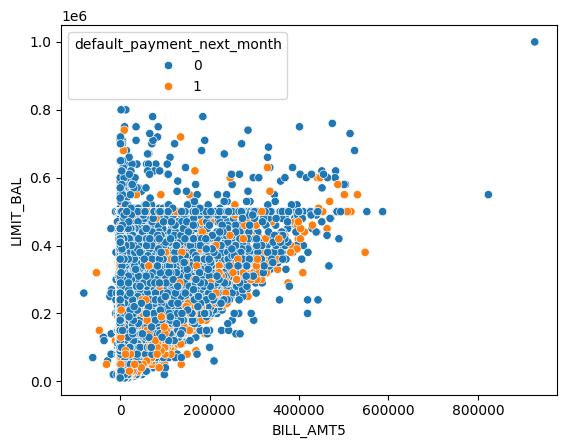

In [51]:
sns.scatterplot(x='BILL_AMT5', y='LIMIT_BAL',data=df , hue = 'default_payment_next_month')

## **BILL_AMT6: Amount of bill statement in April, 2005**

/tmp/ipython-input-4183537235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BILL_AMT6'])


<Axes: xlabel='BILL_AMT6', ylabel='Density'>

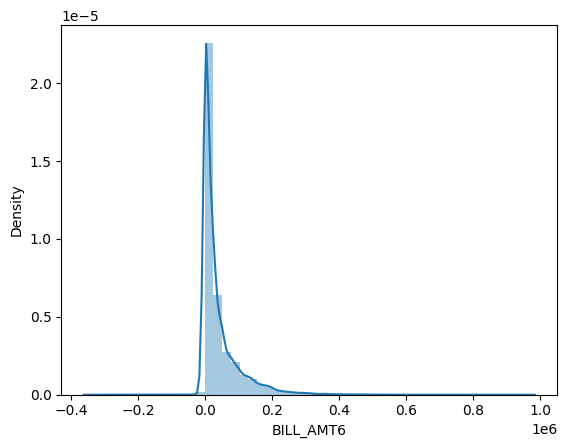

In [52]:
sns.distplot(df['BILL_AMT6'])

<Axes: xlabel='BILL_AMT6'>

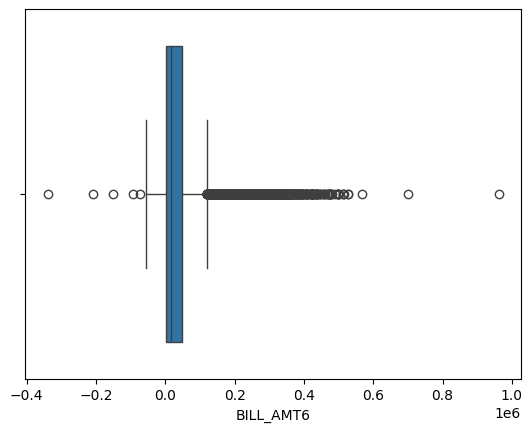

In [53]:
sns.boxplot(x='BILL_AMT6', data=df)

<Axes: xlabel='BILL_AMT6', ylabel='LIMIT_BAL'>

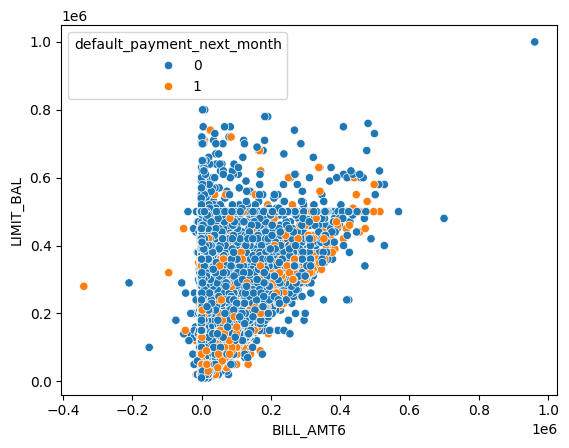

In [54]:
sns.scatterplot(x='BILL_AMT6', y='LIMIT_BAL',data=df , hue = 'default_payment_next_month')

## **PAY_AMT1: Amount of previous payment in September, 2005**

/tmp/ipython-input-1072566477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PAY_AMT1'])


<Axes: xlabel='PAY_AMT1', ylabel='Density'>

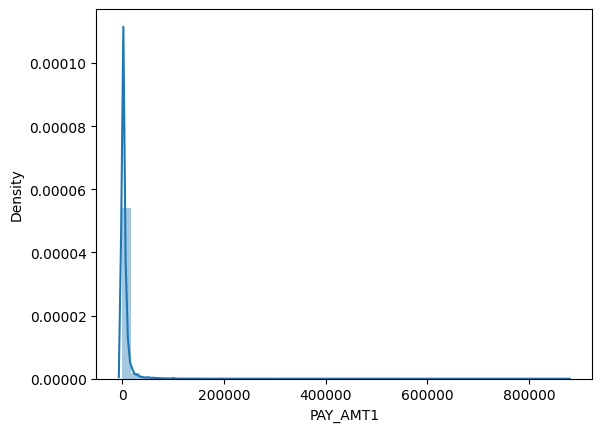

In [55]:
sns.distplot(df['PAY_AMT1'])

<Axes: xlabel='PAY_AMT1'>

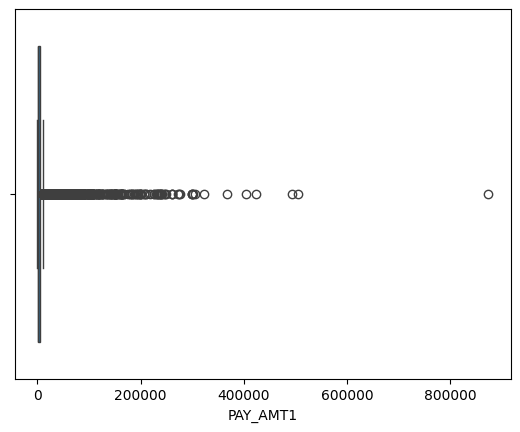

In [56]:
sns.boxplot(x='PAY_AMT1', data=df)

<Axes: xlabel='PAY_AMT1', ylabel='BILL_AMT1'>

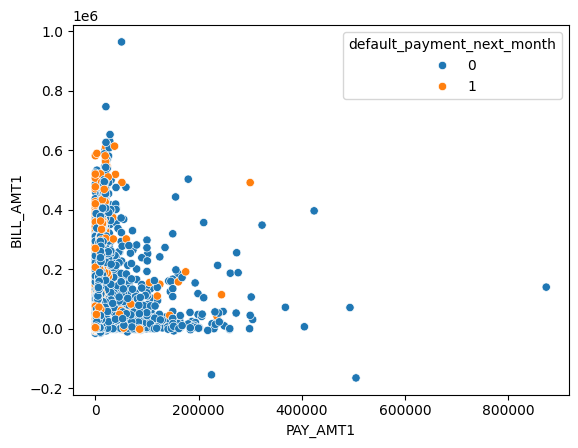

In [57]:
sns.scatterplot(x='PAY_AMT1', y='BILL_AMT1', data=df , hue = 'default_payment_next_month')

## **PAY_AMT2: Amount of previous payment in August, 2005**

/tmp/ipython-input-2641809534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PAY_AMT2'])


<Axes: xlabel='PAY_AMT2', ylabel='Density'>

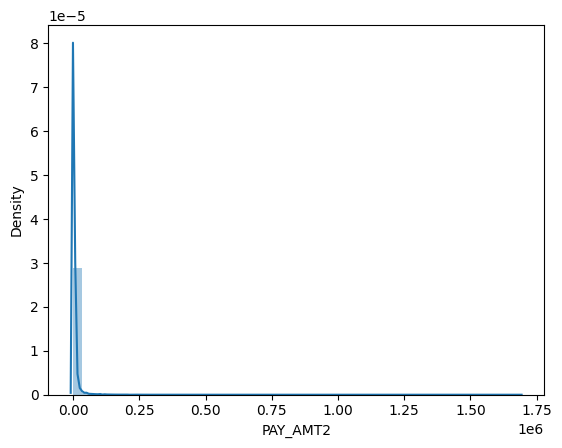

In [58]:
sns.distplot(df['PAY_AMT2'])

<Axes: xlabel='PAY_AMT2'>

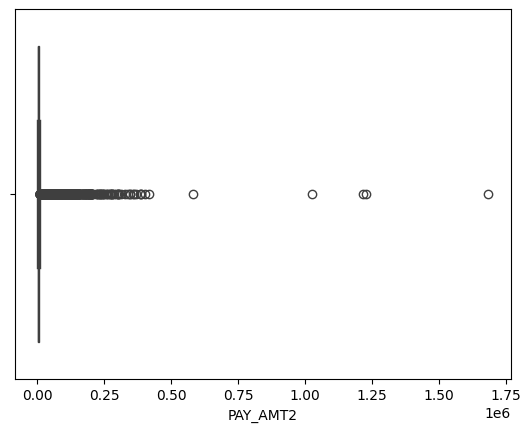

In [59]:
sns.boxplot(x='PAY_AMT2', data=df)

<Axes: xlabel='PAY_AMT2', ylabel='BILL_AMT2'>

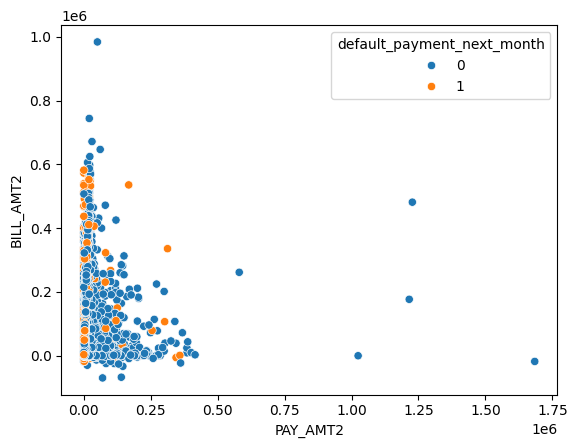

In [60]:
sns.scatterplot(x='PAY_AMT2', y='BILL_AMT2', data=df , hue = 'default_payment_next_month')

## PAY_AMT3: **Amount of previous payment in July, 2005**

/tmp/ipython-input-2872616644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PAY_AMT3'])


<Axes: xlabel='PAY_AMT3', ylabel='Density'>

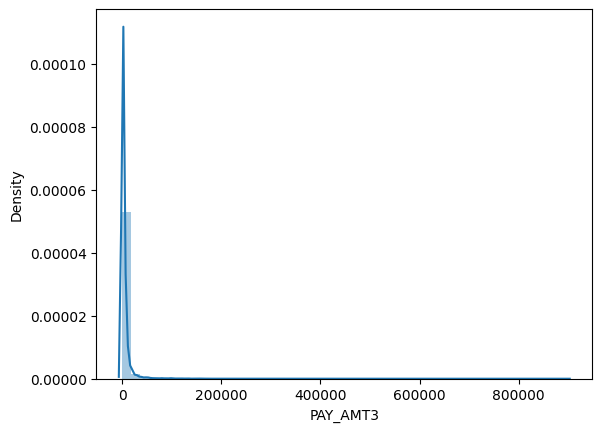

In [61]:
sns.distplot(df['PAY_AMT3'])

<Axes: xlabel='PAY_AMT3'>

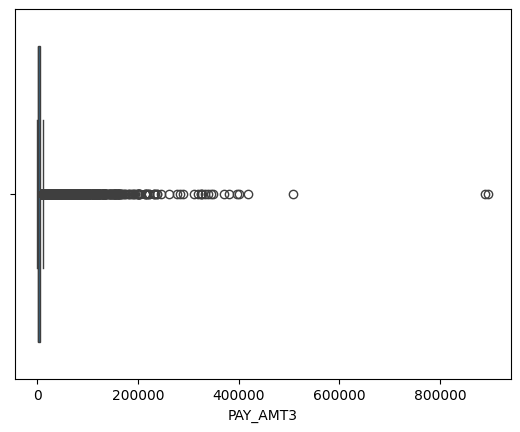

In [62]:
sns.boxplot(x='PAY_AMT3', data=df)

<Axes: xlabel='PAY_AMT3', ylabel='BILL_AMT3'>

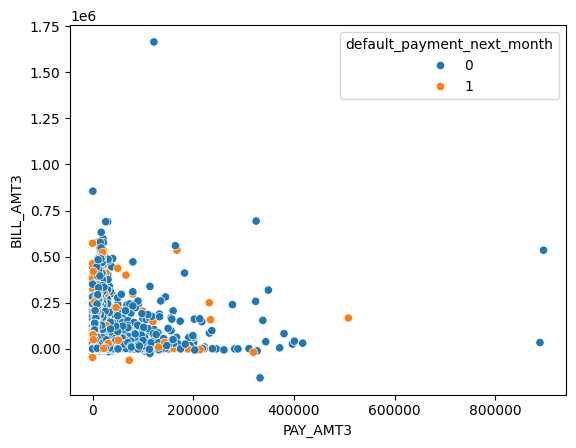

In [63]:
sns.scatterplot(x='PAY_AMT3', y='BILL_AMT3', data=df , hue = 'default_payment_next_month')

## PAY_AMT4: **Amount of previous payment in June, 2005**

/tmp/ipython-input-1119635103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PAY_AMT4'])


<Axes: xlabel='PAY_AMT4', ylabel='Density'>

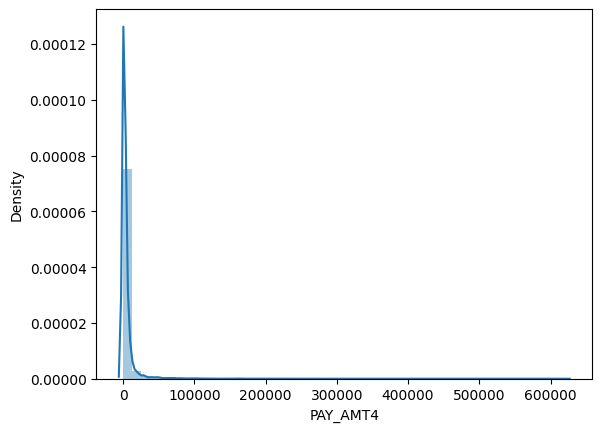

In [64]:
sns.distplot(df['PAY_AMT4'])

<Axes: xlabel='PAY_AMT4'>

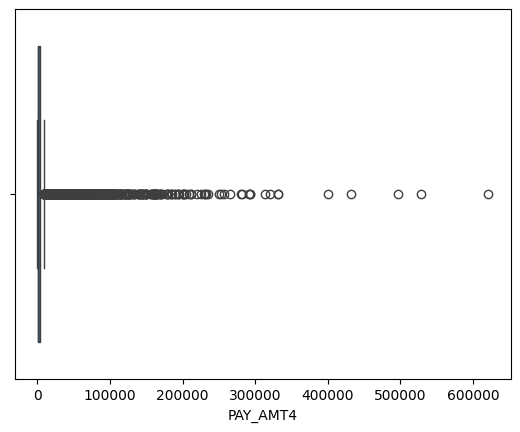

In [65]:
sns.boxplot(x='PAY_AMT4', data=df)

<Axes: xlabel='PAY_AMT4', ylabel='BILL_AMT4'>

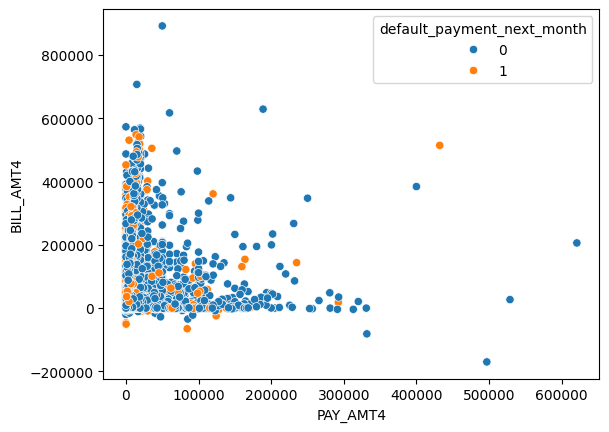

In [66]:
sns.scatterplot(x='PAY_AMT4', y='BILL_AMT4', data=df , hue = 'default_payment_next_month')

## PAY_AMT5: **Amount of previous payment in May, 2005**

/tmp/ipython-input-3869906314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PAY_AMT5'])


<Axes: xlabel='PAY_AMT5', ylabel='Density'>

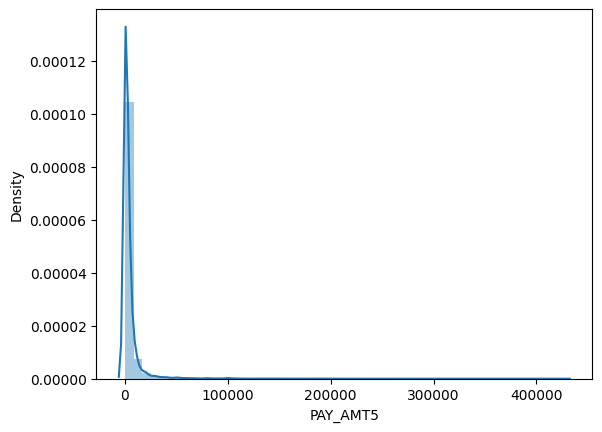

In [67]:
sns.distplot(df['PAY_AMT5'])

<Axes: xlabel='PAY_AMT5'>

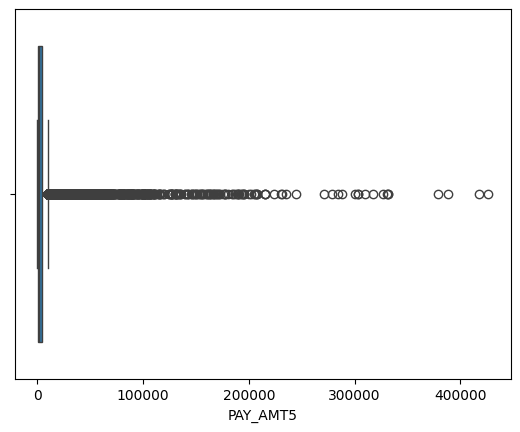

In [68]:
sns.boxplot(x='PAY_AMT5', data=df)

<Axes: xlabel='PAY_AMT5', ylabel='BILL_AMT5'>

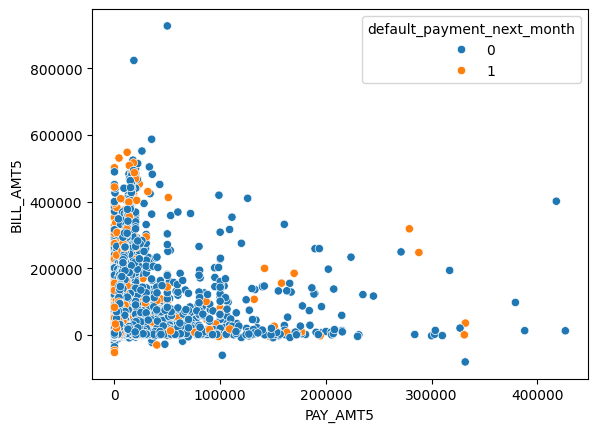

In [69]:
sns.scatterplot(x='PAY_AMT5', y='BILL_AMT5', data=df , hue = 'default_payment_next_month')

## PAY_AMT6: **Amount of previous payment in April, 2005**

/tmp/ipython-input-4082048665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PAY_AMT6'])


<Axes: xlabel='PAY_AMT6', ylabel='Density'>

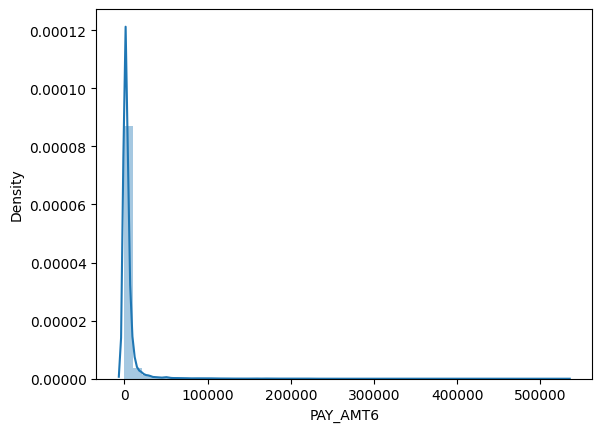

In [70]:
sns.distplot(df['PAY_AMT6'])

<Axes: xlabel='PAY_AMT6'>

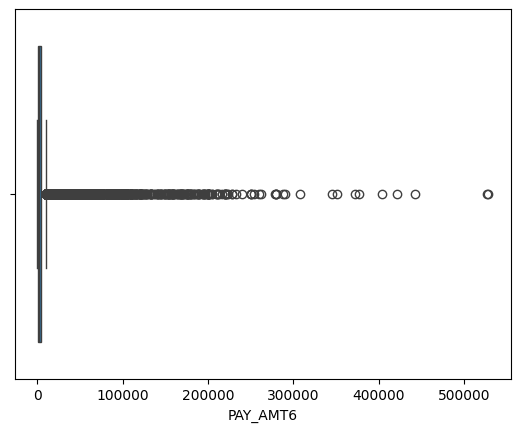

In [71]:
sns.boxplot(x='PAY_AMT6', data=df)

<Axes: xlabel='PAY_AMT6', ylabel='BILL_AMT6'>

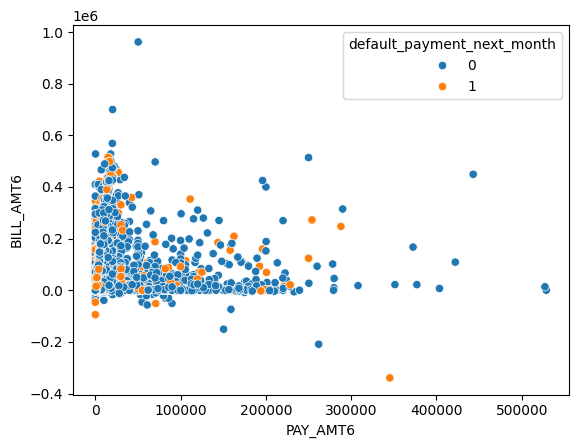

In [72]:
sns.scatterplot(x='PAY_AMT6', y='BILL_AMT6', data=df , hue = 'default_payment_next_month')

### Financial outliers are expected behavior in credit card data. Outliers were inspected and kept because they represent realistic customer financial activity.

### The  plots shows a wide spread and several extreme values, which is expected in financial datasets such as credit card billing and payments. These outliers likely represent high-value transactions or irregular payment behavior rather than data errors.

### Since tree-based models (e.g., Random Forest, XGBoost) are robust to outliers, these points will not negatively impact model performance. Therefore, no manual removal of outliers is applied at this stage; the visualization simply highlights the natural variability in customer financial behavior."

### **Default payment**

*   1=yes
*   0=no



<Axes: xlabel='default_payment_next_month', ylabel='count'>

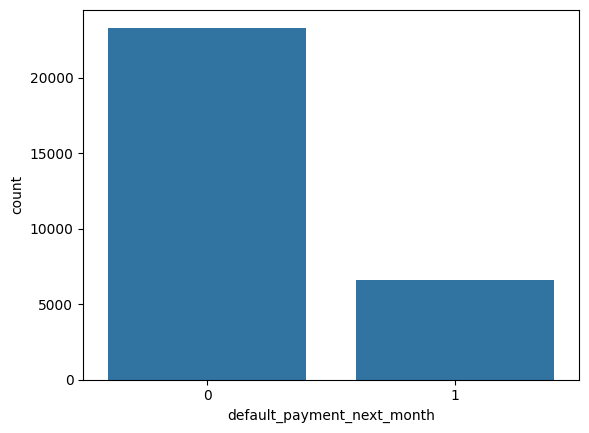

In [73]:
sns.countplot(x='default_payment_next_month', data=df)

In [74]:
df['default_payment_next_month'].value_counts(normalize=True)

,proportion
default_payment_next_month,
0,0.778742
1,0.221258


### The target variable default_payment_next_month is kept as a numerical binary variable (0/1). Classification models in sklearn expect binary targets in numeric form, and using 0/1 ensures correct computation of evaluation metrics such as ROC-AUC, precision, and recall. No encoding is applied to the target.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   29965 non-null  float64 
 1   SEX                         29965 non-null  object  
 2   EDUCATION                   29965 non-null  int64   
 3   MARRIAGE                    29965 non-null  int64   
 4   AGE                         29965 non-null  int64   
 5   PAY_1                       29965 non-null  category
 6   PAY_2                       29965 non-null  category
 7   PAY_3                       29965 non-null  category
 8   PAY_4                       29965 non-null  category
 9   PAY_5                       29965 non-null  category
 10  PAY_6                       29965 non-null  category
 11  BILL_AMT1                   29965 non-null  float64 
 12  BILL_AMT2                   29965 non-null  float64 
 13  BILL_AMT3            

# **Encoding**

In [76]:
df_encoded = pd.get_dummies(df, columns=['SEX','EDUCATION','MARRIAGE'],dtype=int)

In [77]:
df_encoded.head(2)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,1,0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,1,0,0,0,1,0


### The features from PAY_1 to PAY_6 need to be encoded using ordinal encoder , but i won't encode them as they're already ordered.

In [78]:
df_encoded.corr()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
LIMIT_BAL,1.000000,0.144643,-0.271576,-0.296302,-0.286000,-0.267300,-0.249216,-0.234972,0.285877,0.278753,0.283671,0.294428,0.295999,0.290816,0.195454,0.178584,0.210375,0.203451,0.217421,0.219807,-0.153871,-0.025015,0.025015,0.258512,-0.147280,-0.139583,0.013468,0.103641,-0.090932,-0.055992
AGE,0.144643,1.000000,-0.039656,-0.050477,-0.053312,-0.049970,-0.054078,-0.049004,0.056092,0.054136,0.053566,0.051209,0.049202,0.047470,0.026068,0.021726,0.029181,0.021306,0.022777,0.019409,0.013619,0.091057,-0.091057,-0.100403,-0.077762,0.231322,0.008952,0.449177,-0.466347,0.080771
PAY_1,-0.271576,-0.039656,1.000000,0.673592,0.575420,0.539928,0.510455,0.475468,0.187314,0.190107,0.180020,0.179357,0.180867,0.177207,-0.079321,-0.070148,-0.070606,-0.064043,-0.058223,-0.058708,0.324964,0.057932,-0.057932,-0.143442,0.099589,0.059228,-0.024953,-0.016370,0.013224,0.013943
PAY_2,-0.296302,-0.050477,0.673592,1.000000,0.765965,0.661205,0.621810,0.574433,0.234146,0.234524,0.223413,0.221509,0.220633,0.218699,-0.081354,-0.059477,-0.056448,-0.047411,-0.037642,-0.037015,0.263656,0.070700,-0.070700,-0.168412,0.121905,0.064190,-0.033363,-0.022525,0.020317,0.009688
PAY_3,-0.286000,-0.053312,0.575420,0.765965,1.000000,0.776731,0.685882,0.631665,0.207772,0.236648,0.226849,0.226563,0.224515,0.221706,0.000783,-0.067276,-0.053834,-0.046596,-0.036387,-0.036354,0.235230,0.065954,-0.065954,-0.159379,0.115136,0.062098,-0.034675,-0.030552,0.027194,0.014766
PAY_4,-0.267300,-0.049970,0.539928,0.661205,0.776731,1.000000,0.819322,0.715663,0.202113,0.225163,0.244379,0.245321,0.242313,0.238572,-0.009883,-0.002328,-0.069776,-0.043981,-0.034104,-0.027039,0.216551,0.060013,-0.060013,-0.151558,0.109819,0.058017,-0.031230,-0.030131,0.026951,0.013978
PAY_5,-0.249216,-0.054078,0.510455,0.621810,0.685882,0.819322,1.000000,0.816387,0.205998,0.226268,0.242734,0.271370,0.269246,0.261974,-0.006605,-0.003577,0.008636,-0.058842,-0.033852,-0.023497,0.204059,0.054886,-0.054886,-0.137829,0.102678,0.049197,-0.029052,-0.034051,0.032112,0.008388
PAY_6,-0.234972,-0.049004,0.475468,0.574433,0.631665,0.715663,0.816387,1.000000,0.206705,0.226295,0.240591,0.265814,0.290403,0.284603,-0.001990,-0.005600,0.005416,0.018603,-0.046950,-0.025756,0.186740,0.043808,-0.043808,-0.124236,0.097474,0.040987,-0.035964,-0.031737,0.028759,0.013059
BILL_AMT1,0.285877,0.056092,0.187314,0.234146,0.207772,0.202113,0.205998,0.206705,1.000000,0.951457,0.892220,0.860196,0.829688,0.802547,0.140053,0.099181,0.156702,0.158110,0.166832,0.179166,-0.019758,0.033675,-0.033675,-0.023601,0.030097,-0.022252,0.036272,0.025289,-0.021348,-0.017423
BILL_AMT2,0.278753,0.054136,0.190107,0.234524,0.236648,0.225163,0.226268,0.226295,0.951457,1.000000,0.928287,0.892424,0.859704,0.831506,0.280190,0.100679,0.150532,0.147203,0.157761,0.174080,-0.014302,0.031214,-0.031214,-0.019888,0.028491,-0.023006,0.030685,0.022451,-0.018337,-0.018220


In [79]:
corr_matrix = df_encoded.corr()

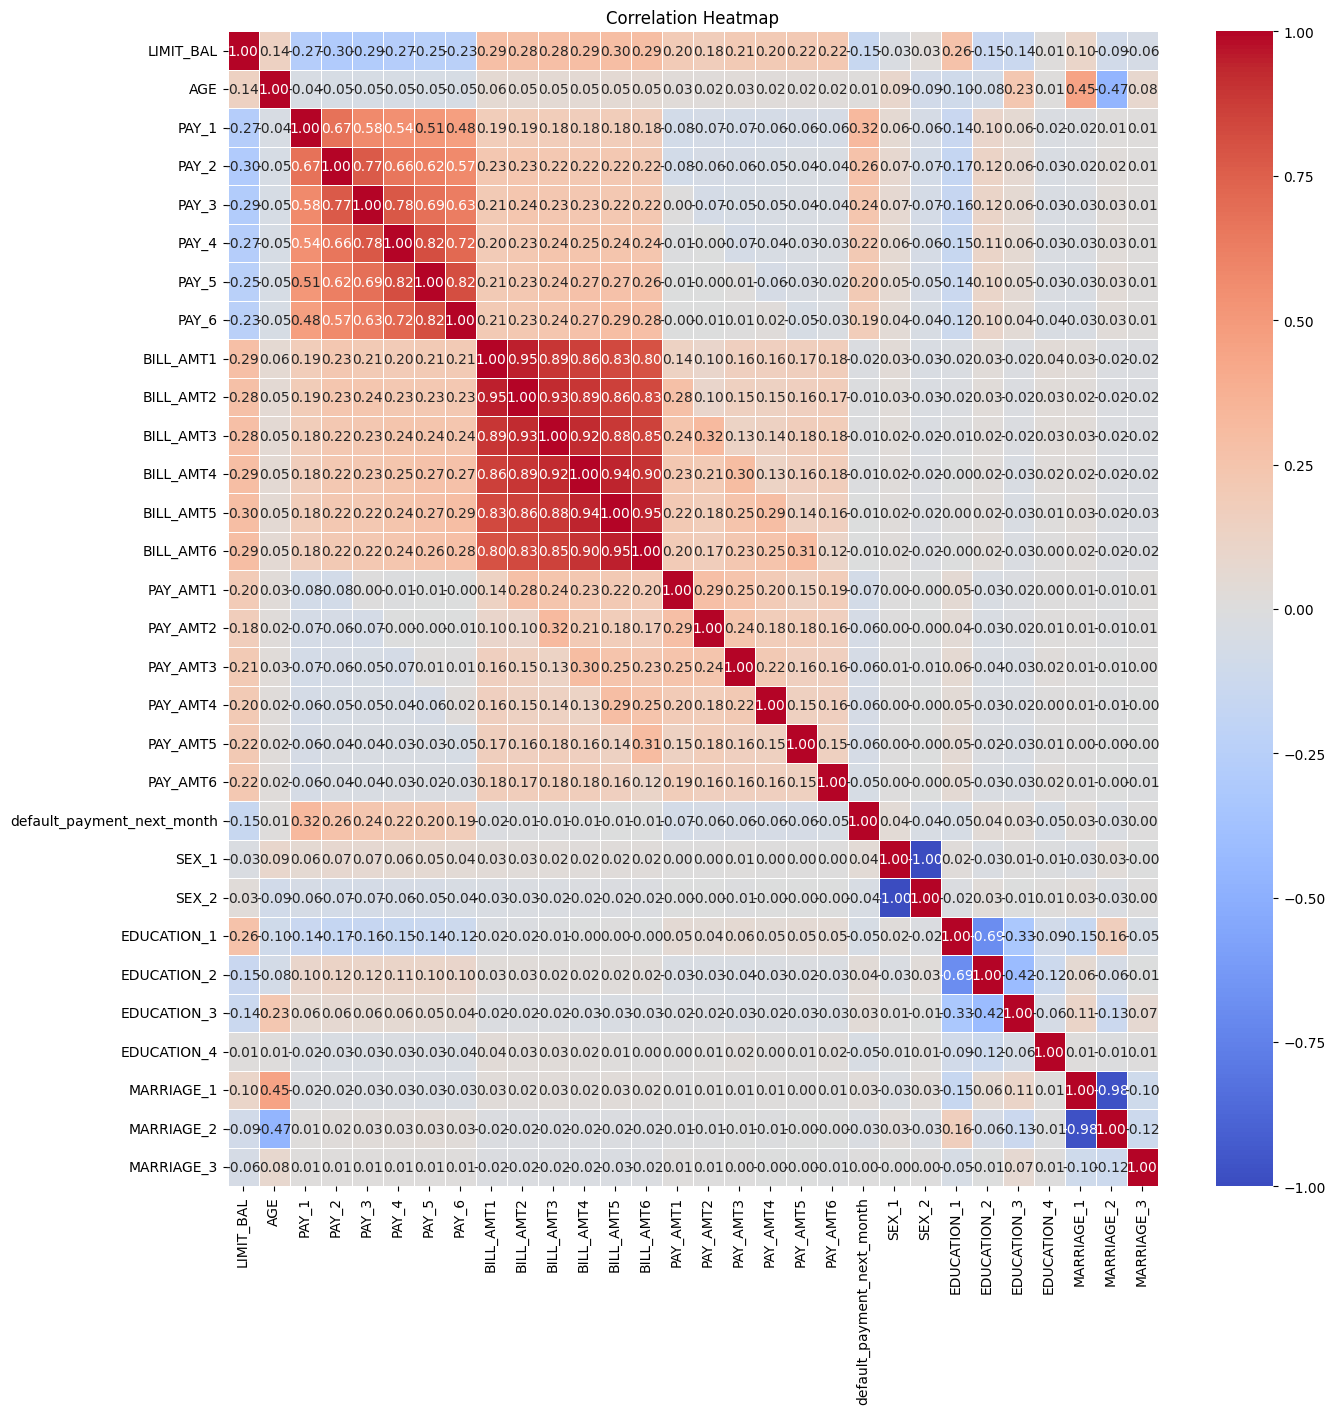

In [80]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## From the above heatmap , the highest features that affect our target are : LIMIT_BAL , PAY_1 , PAY_2, PAY_3 , PAY_4, PAY_5, and PAY_6 .

## Scaling and splitting data

In [81]:
scaler = RobustScaler()
x=df_encoded.drop('default_payment_next_month', axis=1)
y=df_encoded['default_payment_next_month']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42 , stratify=y)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Handling imbalanced data

In [82]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [83]:
y_train_resampled.value_counts()

,count
default_payment_next_month,
0,18668
1,18668


## Model Selection

In [84]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=300),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.9,
        eval_metric="logloss"
    ),
    "SVM": SVC(probability=True, class_weight='balanced')
}

In [85]:
def evaluate_model(model, x_train_resampled, y_train_resampled, x_test_scaled, y_test):
    model.fit(x_train_resampled, y_train_resampled)
    preds = model.predict(x_test_scaled)
    probs = model.predict_proba(x_test_scaled)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-score": f1_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, probs)
    }

In [86]:
results = {}
for name, model in models.items():
    print("Training:", name)
    results[name] = evaluate_model(model, x_train_resampled, y_train_resampled, x_test_scaled, y_test)

Training: Decision Tree
Training: Random Forest
Training: XGBoost
Training: SVM


In [87]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Decision Tree,0.715501,0.382225,0.463801,0.419080,0.625705
Random Forest,0.797931,0.553290,0.450226,0.496466,0.759189
XGBoost,0.808777,0.596154,0.420814,0.493369,0.765287
SVM,0.772234,0.486922,0.547511,0.515442,0.745305


### So the best model is XGBoost in accuracy percentage.But our model should be high in recall .

### So SVM model will be our best choice here .

### We'll try to use SVM with the high correlated features.

In [20]:
x_svm_corr=df[['LIMIT_BAL' , 'PAY_0' , 'PAY_2', 'PAY_3' , 'PAY_4', 'PAY_5',  'PAY_6','default_payment_next_month']]

In [21]:
x_svm_corr.head(2)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment_next_month
0,20000.0,2,2,-1,-1,-2,-2,1
1,120000.0,-1,2,0,0,0,2,1


In [23]:
scaler = StandardScaler()

x=x_svm_corr[['LIMIT_BAL' , 'PAY_0' , 'PAY_2', 'PAY_3' , 'PAY_4', 'PAY_5',  'PAY_6']]
y=x_svm_corr['default_payment_next_month']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42 , stratify=y)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [25]:
y_train_resampled.value_counts()

,count
default_payment_next_month,
0,18668
1,18668


In [26]:
svc_model= SVC(probability=True, class_weight='balanced')

In [28]:
svc_model.fit(x_train_resampled, y_train_resampled)

SVC(class_weight='balanced', probability=True)

In [29]:
y_pred = svc_model.predict(x_test_scaled)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7660604038044385


In [31]:
percetion = precision_score(y_test, y_pred)
print("Precision:", percetion)

Precision: 0.4763387297633873


In [34]:
recall_=recall_score(y_test, y_pred)
print("Recall:", recall_)

Recall: 0.5769230769230769


In [35]:
f1_=f1_score(y_test, y_pred)
print("F1-score:", f1_)

F1-score: 0.5218281036834925


## Using SVM model with only the high priority features raised the recall value which is needed here.